# <center>Customer Analytics</center>

# 1. Business Understanding
---
## Segmentation data - Legend										
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										

<img src="images/1 data dictionary.png"/>

# 2. Data Understanding
---
## Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

## Import Data

In [2]:
# Setting ID column as Index
df_segmentation = pd.read_csv("data/segmentation data.csv",index_col="ID")
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Explore Data

In [3]:
# Descriptive Statistics of the dataset
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### `Customer's Age`
* Minimum age is 18 and Maximum age is 76, so the **Range of age** is **58**
* Average age is 36 approx.

#### `Customer's Income (USD)`
* Minimum income is 36,000 approx and Maximum income is 310,000, so the **Range of Income** is **274,000**
* Average income is 121,000


## Correlation Estimate
**is used to learn the relationships among the different variables**
</br>

**Pearson Correlation-default in Python :** `describes Linear Dependency between variables`
* **+1 Correlation :** `indicates Strong Positive Correlation`
* **0 Correlation :** `indicates No Correlation i.e they are Linearly Independent`
* **-1 Correlation :** `indicates Strong Negative Correlation`

In [4]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [5]:
title_style = {'fontsize': 30,
        'fontweight': "bold",
        'color': "black"}

label_style = {'fontsize': 25,
        'fontweight': "bold",
        'color': "b"}

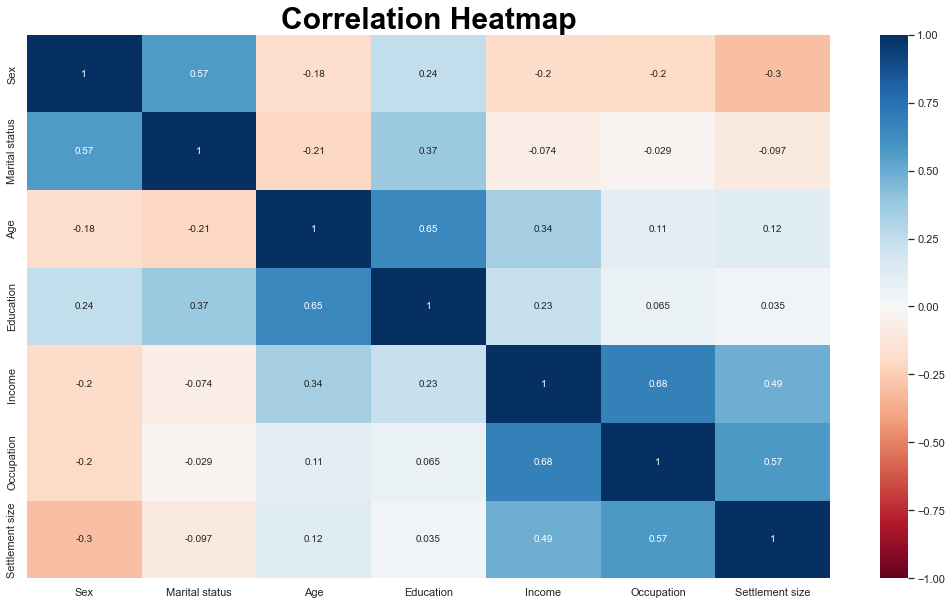

In [6]:
plt.figure(figsize=(18,10))
s = sns.heatmap(df_segmentation.corr(),
               annot=True,
                cmap="RdBu",
                vmax=1,
                vmin=-1
               )
plt.title("Correlation Heatmap", fontdict= title_style)
#plt.xticks(rotation=90)
plt.show()

## Visualize Raw Data

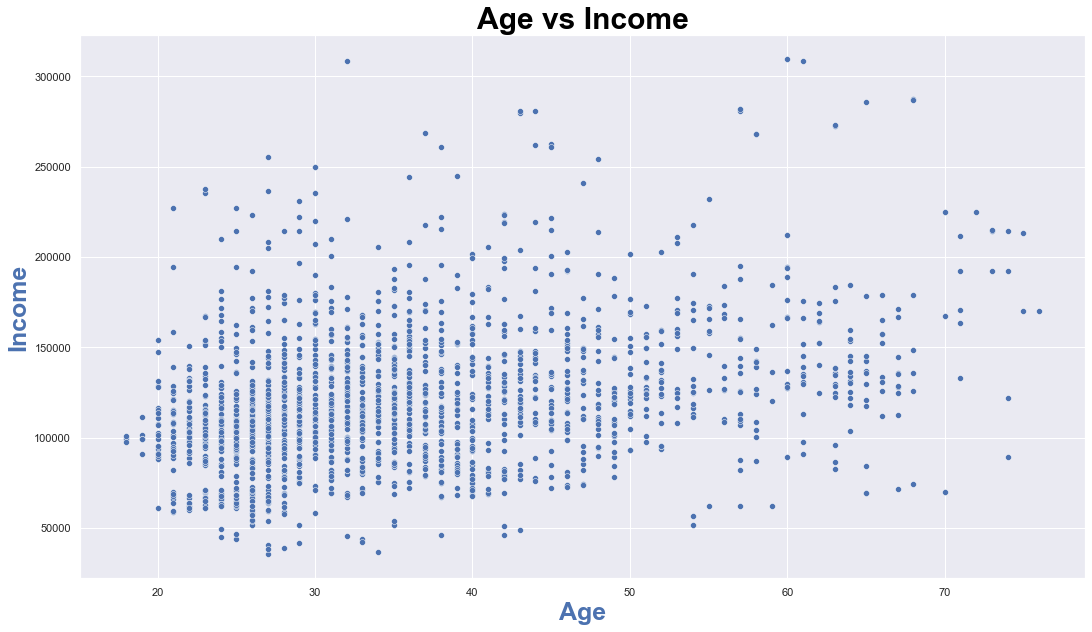

In [7]:
plt.figure(figsize=(18,10))
sns.scatterplot(data= df_segmentation, x = df_segmentation.Age, y = df_segmentation.Income)

plt.title("Age vs Income",fontdict= title_style)
plt.xlabel("Age", fontdict=label_style)
plt.ylabel("Income", fontdict=label_style)

plt.show()

# 3. Data Preparation
---
## Standardization

In [8]:
scaler = StandardScaler()
df_segmentation_standardized = scaler.fit_transform(df_segmentation)

In [9]:
pd.DataFrame(df_segmentation_standardized)

,0,1,2,3,4,5,6
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


# 4. Modelling
---
## Hierarchical Clustering : `for Customer Analytics & Segmentation`
* **dendrogram :** `tree-like hierarchical, representation of points`
* **linkage :** `specific employed method like ward`

In [10]:
# Returns Cluster result as Linkage Matrix
hierarchical_cluster = linkage(df_segmentation_standardized, method="ward") 

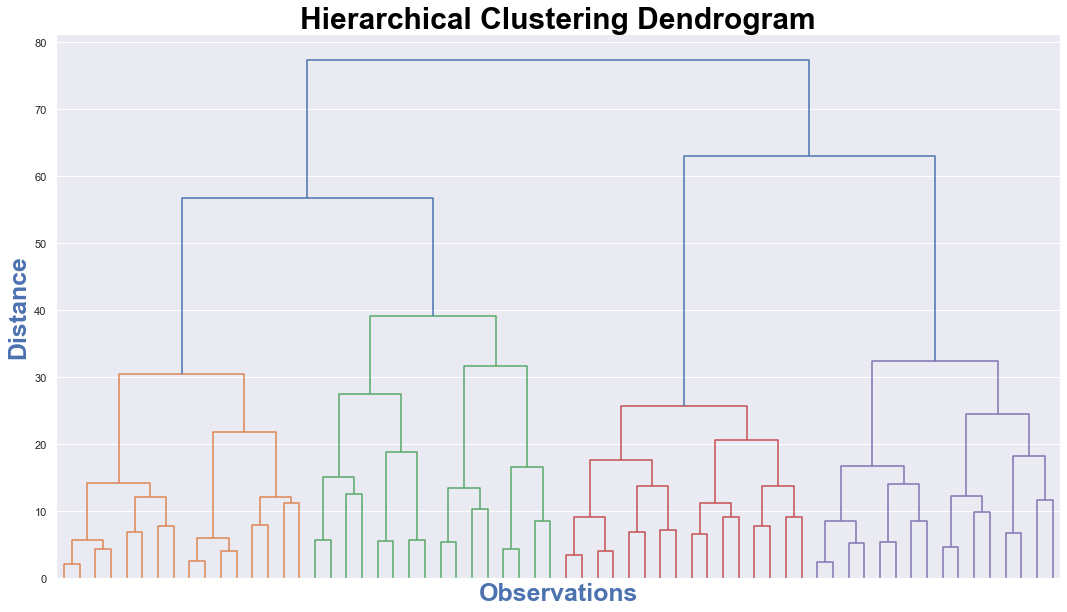

In [12]:
# Represent Linkage Matrix using dendrogram
plt.figure(figsize=(18,10))
dendrogram(hierarchical_cluster,
           truncate_mode="level",
           p=5,
           show_leaf_counts=False, 
           no_labels=True)

plt.title("Hierarchical Clustering Dendrogram", fontdict=title_style)

plt.xlabel("Observations", fontdict=label_style)
plt.ylabel("Distance", fontdict=label_style)

plt.show()

## K-means Clustering
---
### K-means++ `is an initialization algorithm that runs before the actual K-means algorithm to find the best cluster seeds i.e the best starting point for the centroids`

In [25]:
# The wcss value is stored in kmeans.inertia_ attribute
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42) # Creating kmeans object
    kmeans.fit(df_segmentation_standardized)
    wcss.append(kmeans.inertia_)

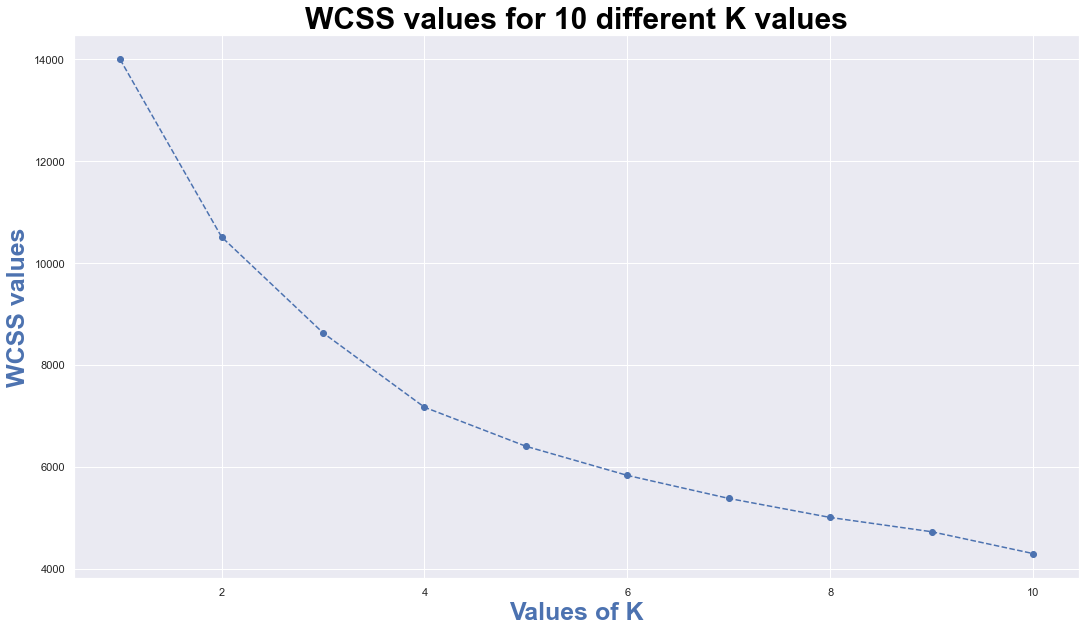

In [24]:
# Plotting wcss values

plt.figure(figsize=(18,10))
plt.plot(range(1,11), wcss, marker="o", linestyle="--")

plt.title("WCSS values for 10 different K values",fontdict=title_style)
plt.xlabel("Values of K", fontdict=label_style)
plt.ylabel("WCSS values", fontdict=label_style)
plt.show()

**To find the best value of K we needed WCSS values and it seems K=4 is the best value according to the Elbow method**

In [26]:
# Creating kmeans object
kmeans = KMeans(n_clusters=4, random_state=42)

In [27]:
kmeans.fit(df_segmentation_standardized)

KMeans(n_clusters=4, random_state=42)

## Analyzing Result

In [28]:
# Making a copy of the orginal Segmentation dataset
df_segmentation_kmeans = df_segmentation.copy()

In [29]:
# Inserting a new column with the predicted Cluster or Segment lables by the model
df_segmentation_kmeans["Segment K-means"] = kmeans.labels_

In [31]:
df_segmentation_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


#### Analyzing mean of the variables wrt each Clusters or Segments

In [37]:
df_segment_analysis = df_segmentation_kmeans.groupby(["Segment K-means"]).mean()
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


#### `Cluster 0`
* *The customers are in their 50s*
* *Average income is approx. 158,000 USD which is the highest among the Segments*
* *This Segment contains equal number of Men and Women, since average sex is 0.5* 
* *Almost 70% of them are in Relationship since average Marital Status is 0.692*
* *And this happens to be cluster of oldest customer since the average age is highest than the others*
* *They are skilled and doing good jobs since average occupation is 1.1 in big cities since Settlement size is 1.1*
* *Basically, they are doing well with their life*
* Customers are **Well-Off**</br>

#### `Cluster 1`
* *The customers are in their 30s living in small cities*
* *Average income is approx. 98,000 USD*
* *36% of the customers are female*
* *Almost all the customers are single*
* *With lowest average income among the Segments* 
* *These customers are not doing well in their life*</br>
* *They are not that skilled or unemployed since average occupation is 0.3*
* *They are living in small cities since average Settlement size is 0.42* </br>
* Customers have **Few Opportunities** </br>

#### `Cluster 2`
* *This is the youngest Segment with average age of 29*
* *Almost all of them are in relationship since marital status is 99%*
* *Earning standard income*
* *Their life is Average*
* *They are not that skilled since average occupation is 0.6*
* Customers are **Standard** </br>

#### `Cluster 3`
* *The average age of the customers in this Segment is approx. 36 and average income is approx. 141,000 USD*
* *29% of them are female i.e most of them are male*
* *17% of them are in relationship*
* *They are highly skilled and doing good jobs since average occupation is 1.3 in big cities since Settlement size is 1.5*
* Customers are **Career Focused**



In [46]:
# Adding Number of customers per Clusters or Segments
df_segment_analysis["No. of Observation"] = df_segmentation_kmeans[["Segment K-means","Sex"]].groupby\
(["Segment K-means"]).count()


In [48]:
df_segment_analysis["Proportion of Obsv"] = df_segment_analysis["No. of Observation"]/df_segment_analysis\
["No. of Observation"].sum()

In [49]:
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No. of Observation,Proportion of Obsv
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


#### Renaming the Segments/Clusters

In [51]:
df_segment_analysis.rename({
    0:"Well-Off",
    1:"Fewer-Opportunities",
    2:"Standard",
    3:"Career-Focused"
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No. of Observation,Proportion of Obsv
Segment K-means,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career-Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


#### Well-Off Cluster
* `Customers are the lowest in proprtion only 13% i.e 263 customers out of 2000`</br>

#### Fewer-Opportunities Cluster
* `Customers are in in proprtion of 23% i.e 462 customers out of 2000`</br>

#### Standard Cluster
* `Customers are the highest in proprtion of 35% i.e 705 customers out of 2000`</br>

#### Career-Focused Cluster
* `Customers are in proprtion of 29% i.e 570 customers out of 2000`</br>

### Labelling the kmeans dataset with Segment Labels via `.map()`

In [54]:
df_segmentation_kmeans["Segment Labels"] = df_segmentation_kmeans["Segment K-means"].map({
    0:"Well-Off",
    1:"Fewer-Opportunities",
    2:"Standard",
    3:"Career-Focused"})


In [56]:
df_segmentation_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Segment Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well-Off
100000002,1,1,22,1,150773,1,2,2,Standard
100000003,0,0,49,1,89210,0,0,1,Fewer-Opportunities
100000004,0,0,45,1,171565,1,1,3,Career-Focused
100000005,0,0,53,1,149031,1,1,3,Career-Focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Fewer-Opportunities
100001997,1,1,27,1,117744,1,0,2,Standard
100001998,0,0,31,0,86400,0,0,1,Fewer-Opportunities


#### Visualizing the dataset

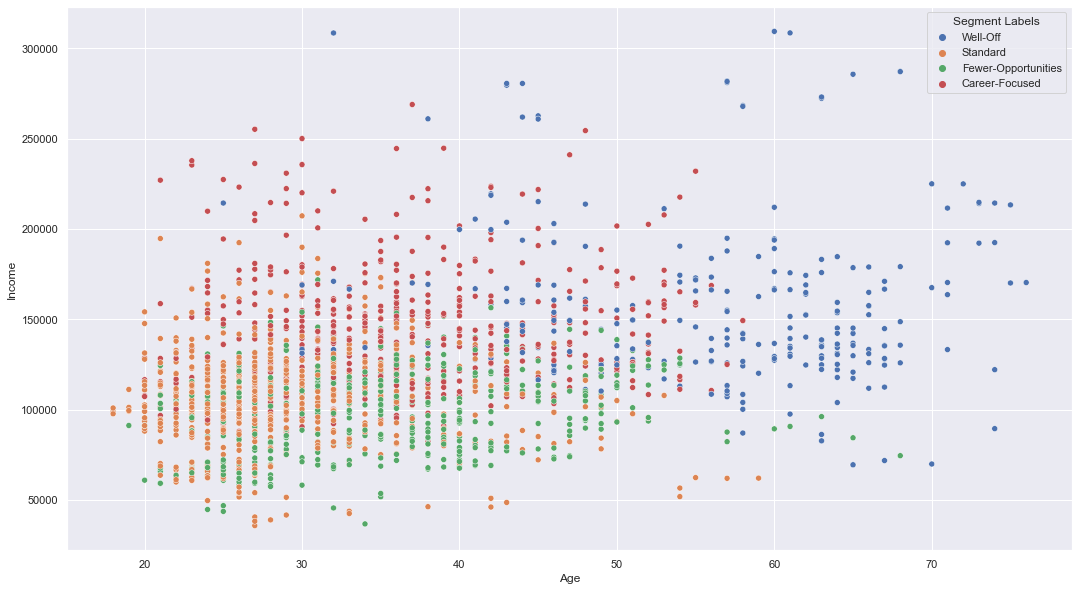

In [57]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_segmentation_kmeans, x="Age",y="Income", hue="Segment Labels")
plt.show()

* *Only the Well-Off Segment is segmented nicely and are separate from the others and are clearly visible, whereas, others are messed up, therefore we will use PCA to achive better result*